## FNGU https://www.bmoetns.com/Documents/FNGU/Fact_Sheet.pdf

### decent tutorial: https://ntguardian.wordpress.com/2016/09/19/introduction-stock-market-data-python-1/

notes: get corr on relavent dates only


TODO: https://en.wikipedia.org/wiki/Vector_autoregression


example at end of: https://machinelearningmastery.com/time-series-forecasting-methods-in-python-cheat-sheet/


example: https://www.analyticsvidhya.com/blog/2018/09/multivariate-time-series-guide-forecasting-modeling-python-codes/

boston housing with vector autoregression

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import math
from sklearn.metrics import mean_squared_error
!pip install pandas-datareader
from pandas_datareader import data as pdr
!pip install fix-yahoo-finance
import fix_yahoo_finance as yf


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


import pandas_datareader.data as web
import datetime
 
  
import matplotlib.pyplot as plt   # Import matplotlib
# This line is necessary for the plot to appear in a Jupyter notebook
%matplotlib inline
# Control the default size of figures in this Jupyter notebook
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 9)   # Change the size of plots

plt.style.use('fivethirtyeight')  
  
  
# We will look at stock prices over the past year, starting at January 1, 2016
start = datetime.datetime(2016,1,1)
end = datetime.date.today()

You should consider upgrading via the 'c:\users\kali\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.
You should consider upgrading via the 'c:\users\kali\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.
c:\users\kali\appdata\local\programs\python\python37\lib\site-packages\fix_yahoo_finance\__init__.py:0: DeprecationWarning: 

*** `fix_yahoo_finance` was renamed to `yfinance`. ***
Please install and use `yfinance` directly using `pip install yfinance -U`

More information: https://github.com/ranaroussi/yfinance



Populating the interactive namespace from numpy and matplotlib


# pretty fucking useless right?... 

<AxesSubplot:xlabel='Date'>

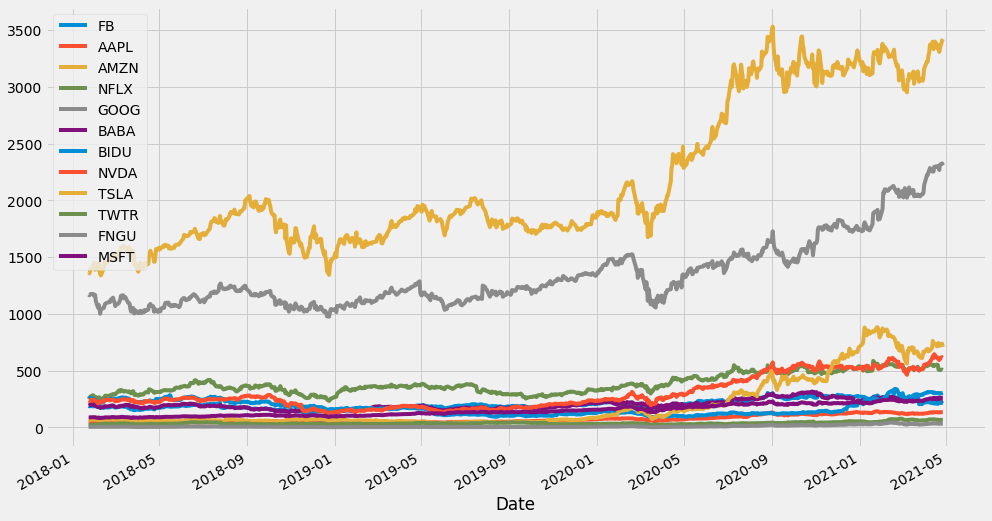

In [2]:
AAPL = web.DataReader("AAPL", "yahoo", start, end)
NFLX = web.DataReader("NFLX", "yahoo", start, end)
GOOG = web.DataReader("GOOG", "yahoo", start, end)
FB   = web.DataReader("FB",   "yahoo", start, end)
AMZN = web.DataReader("AMZN", "yahoo", start, end)
BABA = web.DataReader("BABA", "yahoo", start, end)
BIDU = web.DataReader("BIDU", "yahoo", start, end)
NVDA = web.DataReader("NVDA", "yahoo", start, end)
TSLA = web.DataReader("TSLA", "yahoo", start, end)
TWTR = web.DataReader("TWTR", "yahoo", start, end)

FNGU = web.DataReader("FNGU", "yahoo", start, end)

MSFT = web.DataReader("MSFT", "yahoo", start, end)

stocks = pd.DataFrame({
                      "FB"  : FB["Adj Close"],
                      "AAPL": AAPL["Adj Close"],
                      "AMZN": AMZN["Adj Close"],
                      "NFLX": NFLX["Adj Close"],
                      "GOOG": GOOG["Adj Close"],
                      "BABA": BABA["Adj Close"],
                      "BIDU": BIDU["Adj Close"],
                      "NVDA": NVDA["Adj Close"],
                      "TSLA": TSLA["Adj Close"],
                      "TWTR": TWTR["Adj Close"],
   
                      "FNGU": FNGU["Adj Close"],
    
                      "MSFT": MSFT["Adj Close"]
})
stocks=stocks.dropna()
stocks.plot(grid = True)

## FNGU https://www.bmoetns.com/Documents/FNGU/Fact_Sheet.pdf

<AxesSubplot:xlabel='Date'>

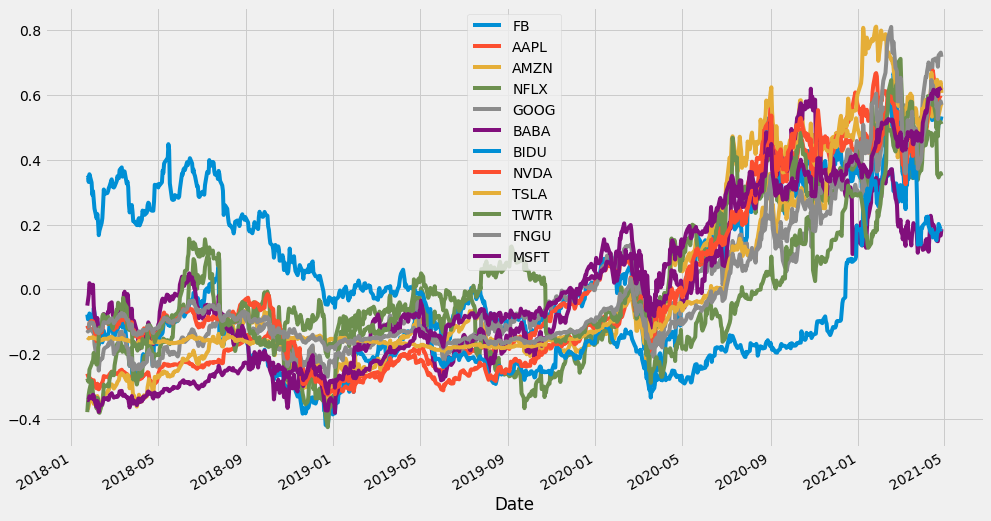

In [6]:
def normIt(myDf):
   return (myDf - myDf.mean()) / (myDf.max() - myDf.min())

# df_apple_norm = normIt(AAPL)
# df_google_norm = normIt(google)
# df_nflx_norm = normIt(NFLX)
# df_FB_norm = normIt(FB)
# df_AMZN_norm = normIt(AMZN)
# df_BABA_norm = normIt(BABA)
# df_BIDU_norm = normIt(BIDU)
# df_NVDA_norm = normIt(NVDA)
# df_TSLA_norm = normIt(TSLA)
# df_TWTR_norm = normIt(TWTR)

# df_microsoft_norm = normIt(microsoft)
stocks_norm = normIt(stocks)
stocks_norm= stocks_norm.dropna()
stocks_norm.plot()

<AxesSubplot:title={'center':'FNGU norm'}, xlabel='Date'>

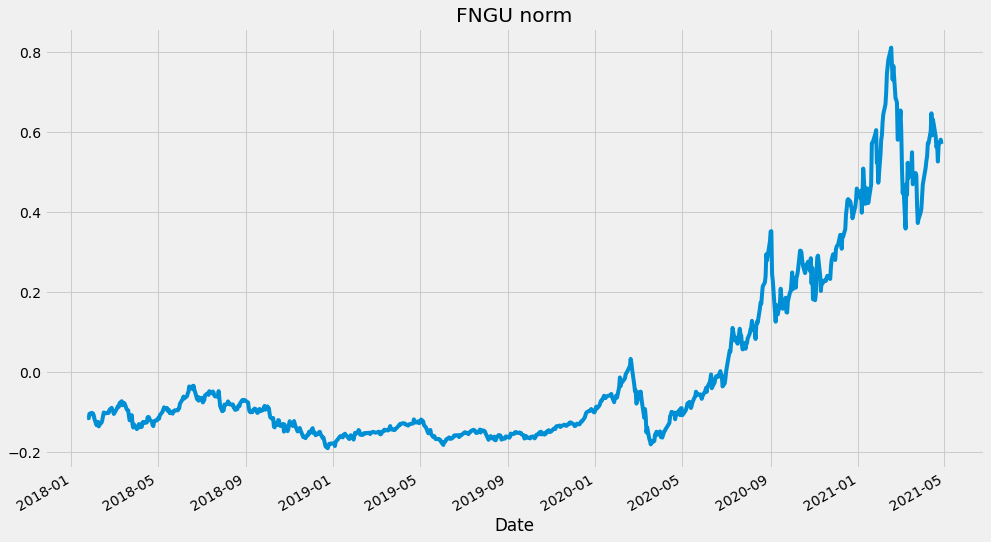

In [7]:
stocks_norm.FNGU.plot(grid = True,title = "FNGU norm")

In [8]:
stocks_norm.head()

,FB,AAPL,AMZN,NFLX,GOOG,BABA,BIDU,NVDA,TSLA,TWTR,FNGU,MSFT
Date,,,,,,,,,,,,
2018-01-23,-0.077730,-0.259886,-0.365803,-0.378757,-0.125806,-0.050096,0.344000,-0.112123,-0.148053,-0.274950,-0.114615,-0.341387
2018-01-24,-0.092543,-0.266143,-0.368098,-0.347519,-0.130049,-0.032674,0.346380,-0.118064,-0.149682,-0.281781,-0.114884,-0.341811
2018-01-25,-0.087623,-0.273043,-0.358772,-0.323687,-0.125510,-0.017663,0.331475,-0.117013,-0.151629,-0.285555,-0.114981,-0.339109
2018-01-26,-0.074292,-0.272155,-0.347777,-0.309785,-0.121460,0.019272,0.355316,-0.103679,-0.150399,-0.247626,-0.104235,-0.329944
2018-01-29,-0.095558,-0.280031,-0.340646,-0.281441,-0.121652,0.007425,0.329876,-0.096954,-0.148823,-0.231268,-0.101823,-0.330686


# ...

In [9]:
corrwith = stocks_norm.corr()
corrwith

,FB,AAPL,AMZN,NFLX,GOOG,BABA,BIDU,NVDA,TSLA,TWTR,FNGU,MSFT
FB,1.000000,0.929900,0.917724,0.873680,0.903074,0.889122,0.024696,0.913998,0.853086,0.728638,0.865555,0.903080
AAPL,0.929900,1.000000,0.962883,0.893771,0.929959,0.868070,-0.006087,0.951351,0.932586,0.691116,0.913538,0.962447
AMZN,0.917724,0.962883,1.000000,0.946000,0.876221,0.863791,-0.044217,0.941601,0.890260,0.664692,0.872746,0.942315
NFLX,0.873680,0.893771,0.946000,1.000000,0.835692,0.830347,0.106675,0.909476,0.863582,0.668744,0.866144,0.864331
GOOG,0.903074,0.929959,0.876221,0.835692,1.000000,0.752528,0.140332,0.888709,0.922679,0.812622,0.935505,0.917103
BABA,0.889122,0.868070,0.863791,0.830347,0.752528,1.000000,-0.013704,0.884281,0.755409,0.519051,0.763151,0.818882
BIDU,0.024696,-0.006087,-0.044217,0.106675,0.140332,-0.013704,1.000000,0.188432,0.245118,0.342268,0.346421,-0.187371
NVDA,0.913998,0.951351,0.941601,0.909476,0.888709,0.884281,0.188432,1.000000,0.920188,0.689156,0.928365,0.871996
TSLA,0.853086,0.932586,0.890260,0.863582,0.922679,0.755409,0.245118,0.920188,1.000000,0.791211,0.978553,0.862001
TWTR,0.728638,0.691116,0.664692,0.668744,0.812622,0.519051,0.342268,0.689156,0.791211,1.000000,0.847743,0.660322


In [10]:
corr_cumSum= corrwith.cumsum()
corr_cumSum

,FB,AAPL,AMZN,NFLX,GOOG,BABA,BIDU,NVDA,TSLA,TWTR,FNGU,MSFT
FB,1.000000,0.929900,0.917724,0.873680,0.903074,0.889122,0.024696,0.913998,0.853086,0.728638,0.865555,0.903080
AAPL,1.929900,1.929900,1.880607,1.767451,1.833034,1.757192,0.018610,1.865348,1.785672,1.419754,1.779093,1.865527
AMZN,2.847624,2.892784,2.880607,2.713451,2.709255,2.620983,-0.025607,2.806949,2.675932,2.084446,2.651839,2.807843
NFLX,3.721304,3.786555,3.826607,3.713451,3.544948,3.451329,0.081068,3.716425,3.539515,2.753191,3.517982,3.672173
GOOG,4.624379,4.716514,4.702829,4.549144,4.544948,4.203858,0.221400,4.605134,4.462194,3.565813,4.453487,4.589276
BABA,5.513501,5.584584,5.566619,5.379490,5.297476,5.203858,0.207696,5.489415,5.217602,4.084864,5.216638,5.408159
BIDU,5.538198,5.578497,5.522403,5.486165,5.437808,5.190153,1.207696,5.677846,5.462720,4.427132,5.563059,5.220787
NVDA,6.452195,6.529848,6.464004,6.395641,6.326516,6.074434,1.396127,6.677846,6.382908,5.116289,6.491424,6.092783
TSLA,7.305282,7.462434,7.354264,7.259224,7.249195,6.829843,1.641245,7.598034,7.382908,5.907499,7.469977,6.954784
TWTR,8.033920,8.153550,8.018956,7.927968,8.061817,7.348894,1.983513,8.287191,8.174119,6.907499,8.317720,7.615107


In [11]:
keepThese = corr_cumSum.loc[:, corr_cumSum.iloc[-1] > corr_cumSum.iloc[-1].mean()*1.1]
keepThese

,AAPL,NVDA,TSLA,FNGU
FB,0.929900,0.913998,0.853086,0.865555
AAPL,1.929900,1.865348,1.785672,1.779093
AMZN,2.892784,2.806949,2.675932,2.651839
NFLX,3.786555,3.716425,3.539515,3.517982
GOOG,4.716514,4.605134,4.462194,4.453487
BABA,5.584584,5.489415,5.217602,5.216638
BIDU,5.578497,5.677846,5.462720,5.563059
NVDA,6.529848,6.677846,6.382908,6.491424
TSLA,7.462434,7.598034,7.382908,7.469977
TWTR,8.153550,8.287191,8.174119,8.317720


In [12]:
# keepThese = keepThese.loc[:, keepThese.iloc[-1] > keepThese.iloc[-1].mean()]
# keepThese

In [13]:
dropAllButThese = keepThese.columns.to_list()
dropAllButThese.append("FNGU")
dropAllButThese=list(set(dropAllButThese))

In [14]:
corrwith[dropAllButThese]#.cumsum()

,AAPL,NVDA,FNGU,TSLA
FB,0.929900,0.913998,0.865555,0.853086
AAPL,1.000000,0.951351,0.913538,0.932586
AMZN,0.962883,0.941601,0.872746,0.890260
NFLX,0.893771,0.909476,0.866144,0.863582
GOOG,0.929959,0.888709,0.935505,0.922679
BABA,0.868070,0.884281,0.763151,0.755409
BIDU,-0.006087,0.188432,0.346421,0.245118
NVDA,0.951351,1.000000,0.928365,0.920188
TSLA,0.932586,0.920188,0.978553,1.000000
TWTR,0.691116,0.689156,0.847743,0.791211


<AxesSubplot:xlabel='Date'>

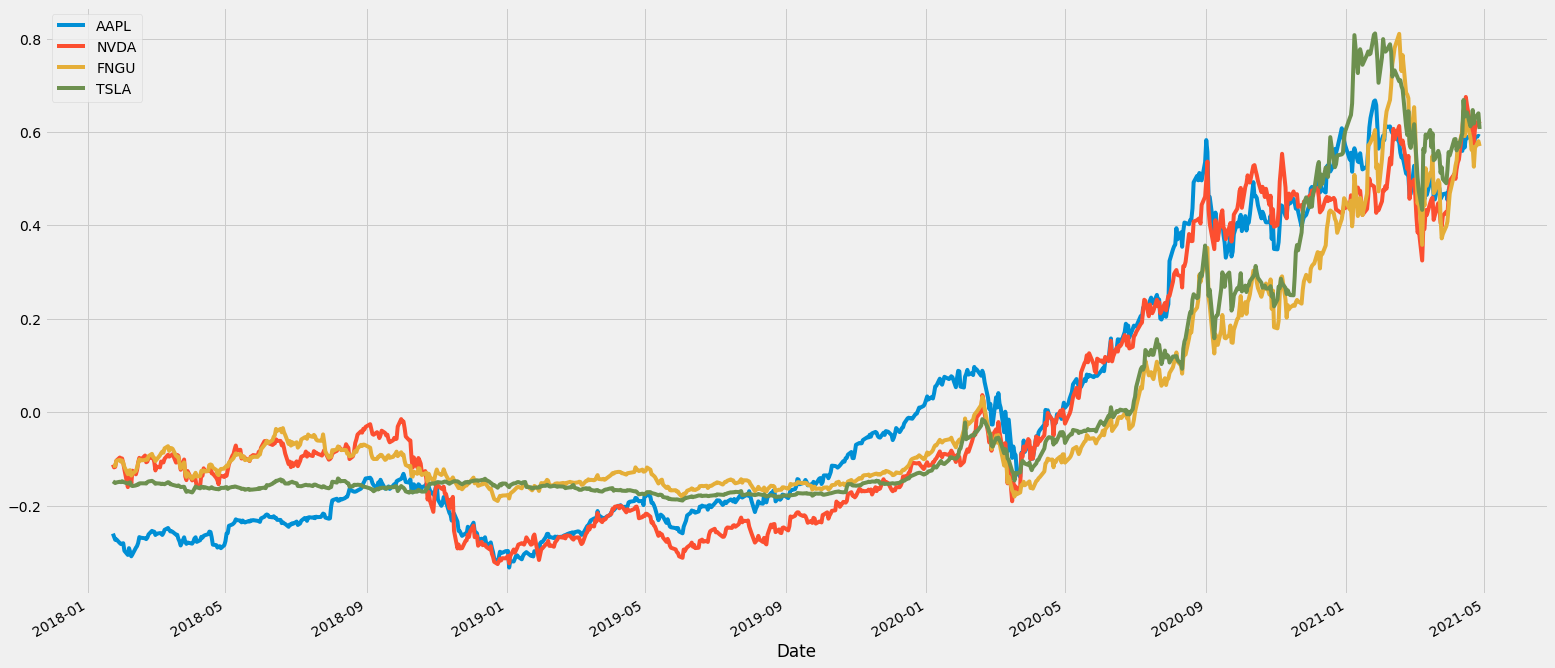

In [15]:
stocks_main = stocks[dropAllButThese]
stocks_main_norm= normIt(stocks_main)
stocks_main_norm.plot(figsize=(24,12))

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

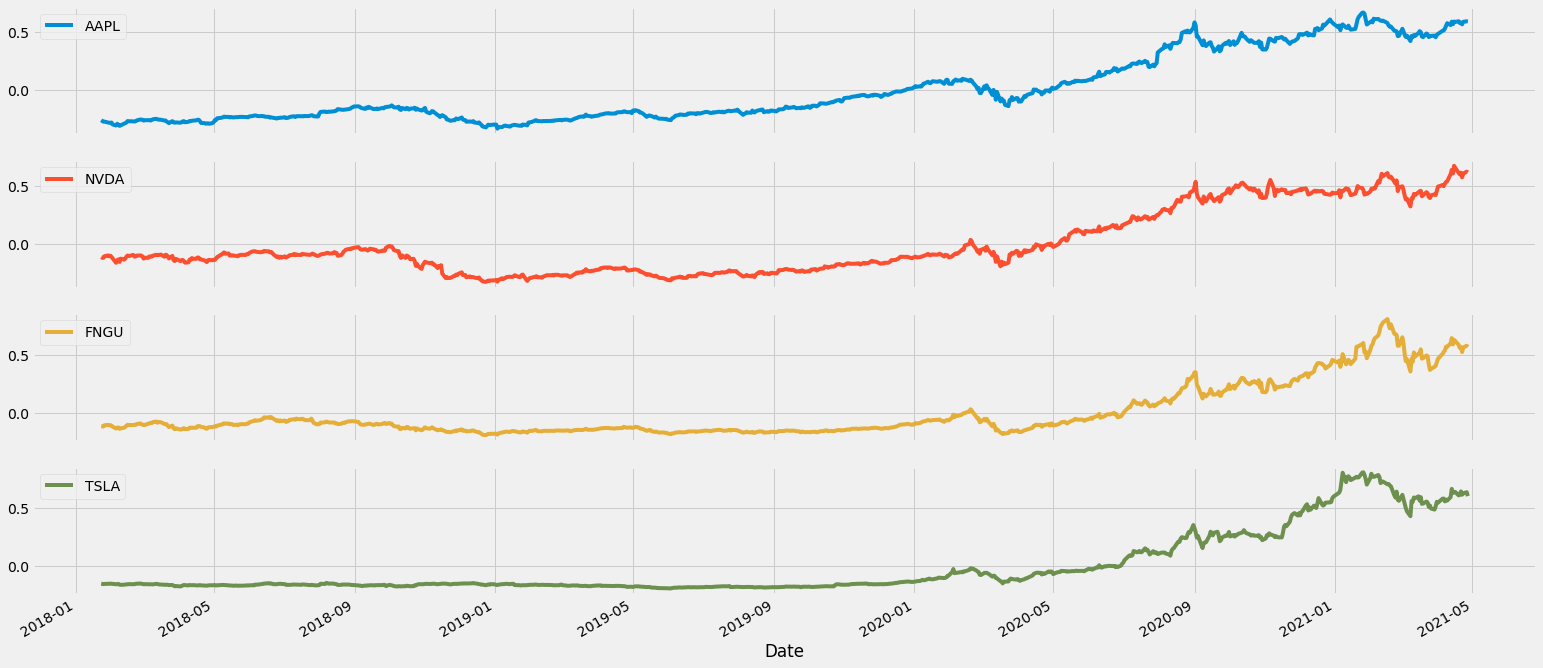

In [16]:
#stocks = stocks.loc[:,~stocks.columns.duplicated()]
stocks_main_norm.plot(subplots=True, figsize=(24, 12))

<AxesSubplot:xlabel='Date'>

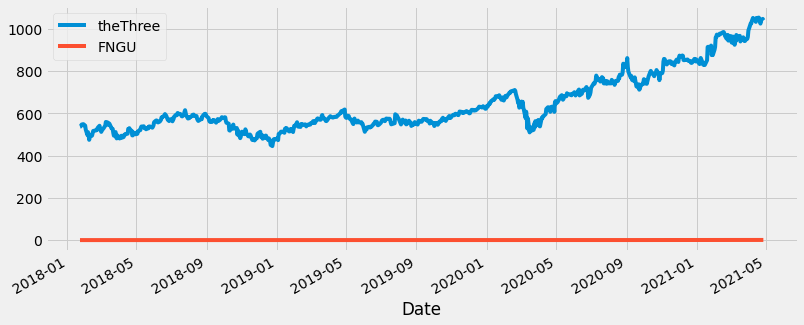

In [17]:
theThree = stocks.GOOG + stocks.FB + stocks.NFLX
theThree /=3

quickDF= pd.DataFrame({
    'theThree': theThree,
    'FNGU': normIt(web.DataReader("FNGU", "yahoo", start, end).Close)
})
quickDF.plot(figsize = (12,5))

<AxesSubplot:xlabel='Date'>

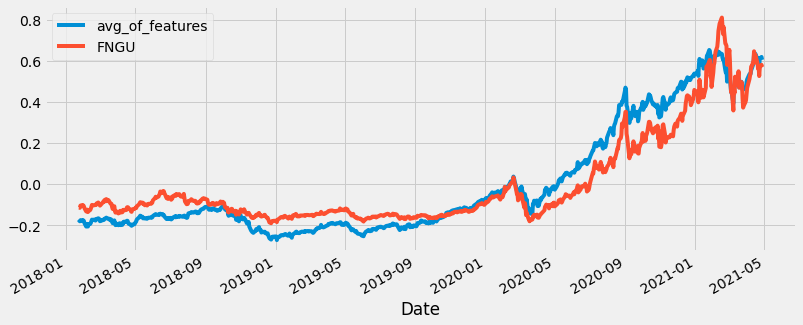

In [18]:
try:
  fngu = stocks_main_norm.FNGU
  stocks_main_norm=stocks_main_norm.drop(["FNGU"], axis=1)
except:
  None

# avg_of_features = 0
# temp = None

# for ticker in stocks_main_norm.columns:
#   temp += stocks_main_norm[ticker]
#   print(ticker)

theThree = stocks.GOOG + stocks.FB + stocks.NFLX
theThree /=3

quickDF= pd.DataFrame({
    'avg_of_features': stocks_main_norm.mean(axis=1),
    'FNGU': fngu #normIt(web.DataReader("FNGU", "yahoo", start, end).Close)
})
quickDF.plot(figsize = (12,5))

# Prediction



c:\users\kali\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  
c:\users\kali\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima

<AxesSubplot:xlabel='Date'>

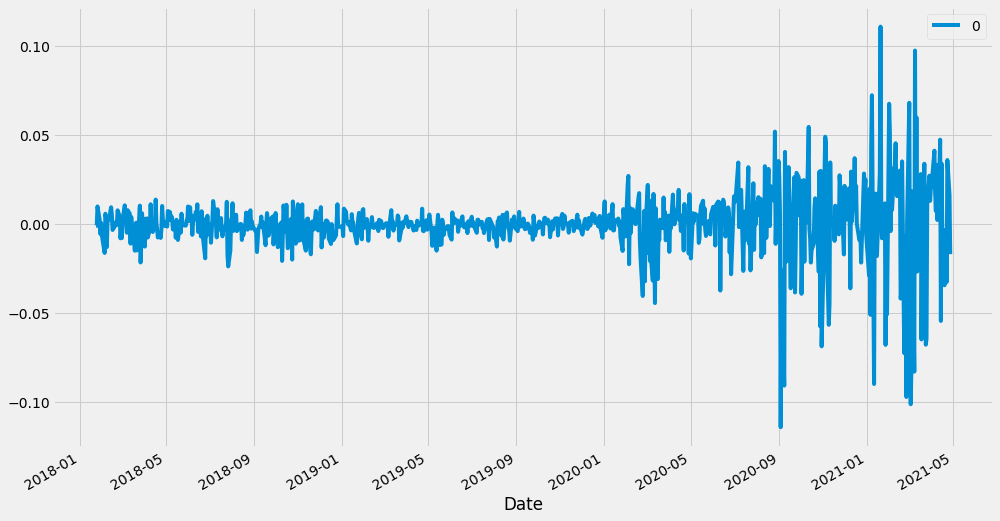

<AxesSubplot:ylabel='Density'>

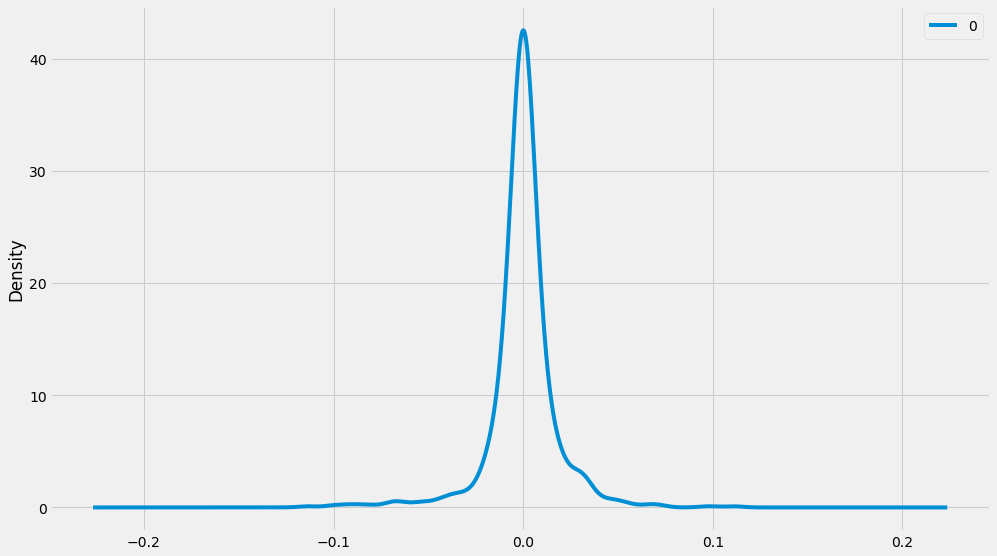

                  0
count  8.200000e+02
mean   3.206592e-07
std    1.839229e-02
min   -1.142035e-01
25%   -4.759900e-03
50%    2.793273e-04
75%    5.315771e-03
max    1.110660e-01


In [19]:
# https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/
from pandas import datetime
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
 
  

model = ARIMA(quickDF["FNGU"], order=(5,1,0))
model_fit = model.fit(disp=0)
#print(model_fit.summary())
# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()

residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())




c:\users\kali\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


predicted=0.385739, expected=0.413686
predicted=0.410974, expected=0.429865
predicted=0.437210, expected=0.458204
predicted=0.459483, expected=0.453477
predicted=0.457222, expected=0.433935
predicted=0.429765, expected=0.452941
predicted=0.448571, expected=0.397944
predicted=0.404384, expected=0.442926
predicted=0.432263, expected=0.508083
predicted=0.516188, expected=0.420045
predicted=0.437320, expected=0.438150
predicted=0.425465, expected=0.458691
predicted=0.453216, expected=0.449237
predicted=0.454192, expected=0.422092
predicted=0.430531, expected=0.467756
predicted=0.459473, expected=0.571218
predicted=0.566554, expected=0.573265
predicted=0.579886, expected=0.577700
predicted=0.577021, expected=0.595439
predicted=0.588849, expected=0.604089
predicted=0.596667, expected=0.522460
predicted=0.528589, expected=0.530672
predicted=0.526934, expected=0.472751
predicted=0.476414, expected=0.541710
predicted=0.533514, expected=0.579113
predicted=0.593531, expected=0.590517
predicted=0.

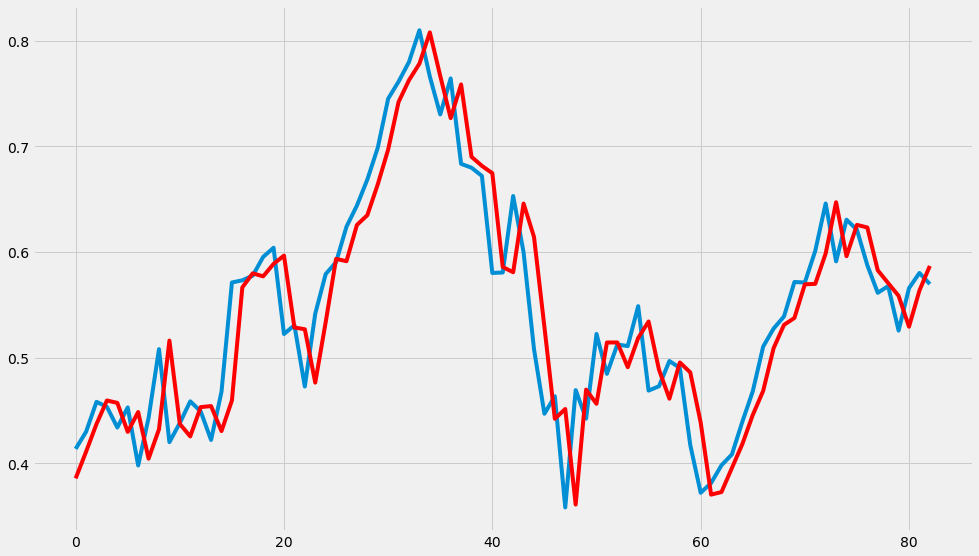

In [20]:
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')

X = quickDF["FNGU"].values
size = int(len(X) * 0.9)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test+10)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.5f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

# ARIMA to forecast 

c:\users\kali\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


predicted=0.390001, expected=0.413686
predicted=0.412918, expected=0.429865
predicted=0.444925, expected=0.458204
predicted=0.457638, expected=0.453477
predicted=0.454143, expected=0.433935
predicted=0.428981, expected=0.452941
predicted=0.452218, expected=0.397944
predicted=0.419023, expected=0.442926
predicted=0.435680, expected=0.508083
predicted=0.515905, expected=0.420045
predicted=0.456325, expected=0.438150
predicted=0.428163, expected=0.458691
predicted=0.444733, expected=0.449237
predicted=0.466815, expected=0.422092
predicted=0.451949, expected=0.467756
predicted=0.455953, expected=0.571218
predicted=0.547416, expected=0.573265
predicted=0.566218, expected=0.577700
predicted=0.565814, expected=0.595439
predicted=0.572956, expected=0.604089
predicted=0.591152, expected=0.522460
predicted=0.543399, expected=0.530672
predicted=0.542445, expected=0.472751
predicted=0.492681, expected=0.541710
predicted=0.545881, expected=0.579113
predicted=0.603359, expected=0.590517
predicted=0.

c:\users\kali\appdata\local\programs\python\python37\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


predicted=0.588183, expected=0.588183
predicted=0.580134, expected=0.580134
predicted=0.579572, expected=0.579572
predicted=0.586083, expected=0.586083
predicted=0.587679, expected=0.587679
predicted=0.585383, expected=0.585383
predicted=0.589868, expected=0.589868
predicted=0.591565, expected=0.591565
predicted=0.592552, expected=0.592552


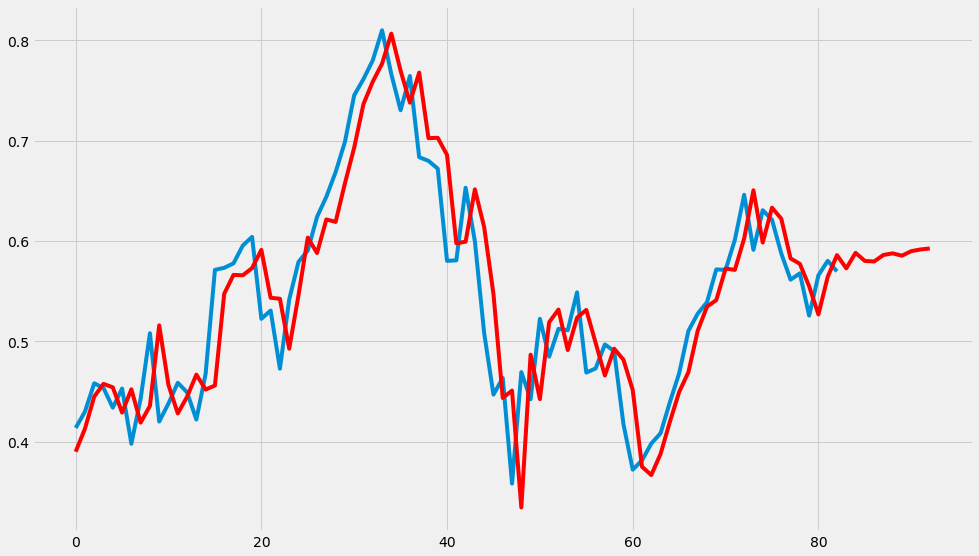

In [21]:
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')

X = quickDF["FNGU"].values
size = int(len(X) * 0.9)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
#print (history==train) #True 
for t in range(len(test)+10):
    model = ARIMA(history[-1*len(test):], order=(5,1,0)) # changed*
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    try:
      obs = test[t]
    except IndexError:
      obs = yhat
	

    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
 
# error = mean_squared_error(test, predictions)
# print('Test MSE: %.5f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

In [22]:
import numpy as np

#stock_change = stocks.apply(lambda x: np.log(x) - np.log(x.shift(1))) # shift moves dates back by 1.
stock_change = stocks.apply(lambda x: (x) - (x.shift(1))) # shift moves dates back by 1.
stock_change=stock_change.dropna()
stock_change.head()

,FB,AAPL,AMZN,NFLX,GOOG,BABA,BIDU,NVDA,TSLA,TWTR,FNGU,MSFT
Date,,,,,,,,,,,,
2018-01-24,-2.800003,-0.677422,-5.030029,11.009995,-5.729980,3.250000,0.609985,-3.084183,-1.379997,-0.379999,-0.011,-0.076515
2018-01-25,0.929993,-0.747082,20.439941,8.400024,6.130005,2.800003,-3.819992,0.545410,-1.650002,-0.210001,-0.004,0.487732
2018-01-26,2.520004,0.096088,24.100098,4.899994,5.469971,6.889999,6.110001,6.922104,1.042000,2.110001,0.441,1.654388
2018-01-29,-4.020004,-0.852783,15.630005,9.989990,-0.260010,-2.210007,-6.520004,3.490784,1.335999,0.910000,0.099,-0.133881
2018-01-30,1.139999,-0.237816,20.139893,-5.790009,-11.890015,-3.349991,-9.659988,-4.095749,-0.741997,0.440001,-0.165,-1.128433


array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

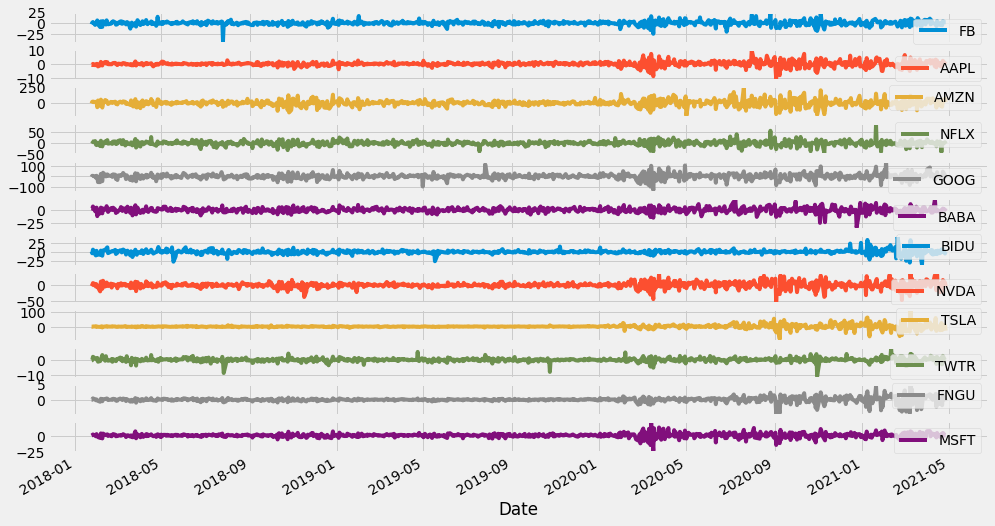

In [23]:
stock_change.plot(grid = True,subplots=True)#.axhline(y = 0, color = "black", lw = 2)

In [24]:
!pip install https://github.com/matplotlib/mpl_finance/archive/master.zip


  Created wheel for mpl-finance: filename=mpl_finance-0.10.1-py3-none-any.whl size=8423 sha256=1a9a86988f12d9d44d957cdd5d9ce428590116687c509b6ccc3a43270688bd08
  Stored in directory: C:\Users\kali\AppData\Local\Temp\pip-ephem-wheel-cache-ueyzvg3d\wheels\eb\17\99\0f3929e635912eb25fc346aaf43b4ee3da4a80dee8ce3d2e4f
Successfully built mpl-finance


You should consider upgrading via the 'c:\users\kali\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.


c:\users\kali\appdata\local\programs\python\python37\lib\site-packages\mpl_finance.py:22: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  category=DeprecationWarning)


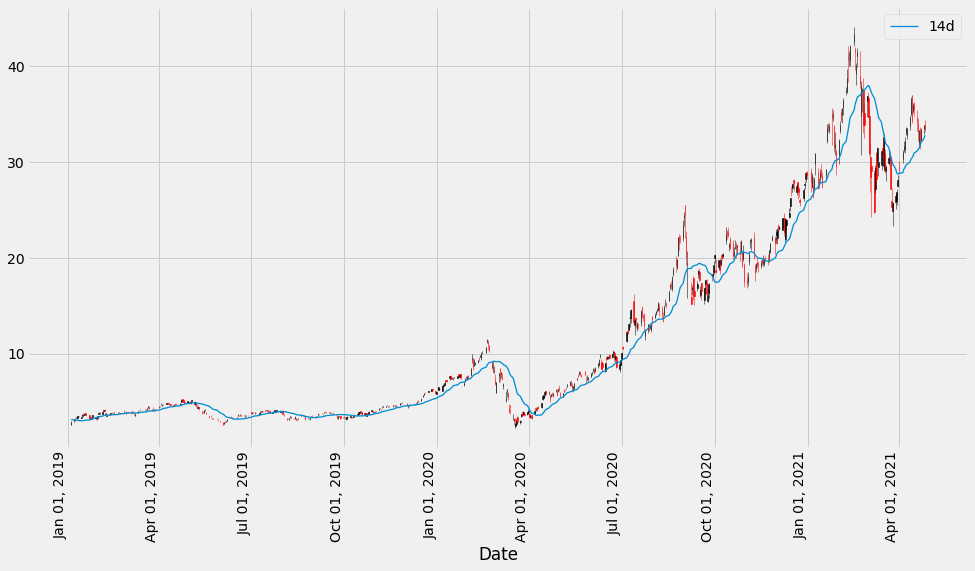

In [25]:
 
from matplotlib.dates import DateFormatter, WeekdayLocator,    DayLocator, MONDAY
from mpl_finance import candlestick_ohlc
 
def pandas_candlestick_ohlc(dat, stick = "day", otherseries = None):
    """
    :param dat: pandas DataFrame object with datetime64 index, and float columns "Open", "High", "Low", and "Close", likely created via DataReader from "yahoo"
    :param stick: A string or number indicating the period of time covered by a single candlestick. Valid string inputs include "day", "week", "month", and "year", ("day" default), and any numeric input indicates the number of trading days included in a period
    :param otherseries: An iterable that will be coerced into a list, containing the columns of dat that hold other series to be plotted as lines
 
    This will show a Japanese candlestick plot for stock data stored in dat, also plotting other series if passed.
    """
    mondays = WeekdayLocator(MONDAY)        # major ticks on the mondays
    alldays = DayLocator()              # minor ticks on the days
    dayFormatter = DateFormatter('%d')      # e.g., 12
 
    # Create a new DataFrame which includes OHLC data for each period specified by stick input
    transdat = dat.loc[:,["Open", "High", "Low", "Close"]]
    if (type(stick) == str):
        if stick == "day":
            plotdat = transdat
            stick = 1 # Used for plotting
        elif stick in ["week", "month", "year"]:
            if stick == "week":
                transdat["week"] = pd.to_datetime(transdat.index).map(lambda x: x.isocalendar()[1]) # Identify weeks
            elif stick == "month":
                transdat["month"] = pd.to_datetime(transdat.index).map(lambda x: x.month) # Identify months
            transdat["year"] = pd.to_datetime(transdat.index).map(lambda x: x.isocalendar()[0]) # Identify years
            grouped = transdat.groupby(list(set(["year",stick]))) # Group by year and other appropriate variable
            plotdat = pd.DataFrame({"Open": [], "High": [], "Low": [], "Close": []}) # Create empty data frame containing what will be plotted
            for name, group in grouped:
                plotdat = plotdat.append(pd.DataFrame({"Open": group.iloc[0,0],
                                            "High": max(group.High),
                                            "Low": min(group.Low),
                                            "Close": group.iloc[-1,3]},
                                           index = [group.index[0]]))
            if stick == "week": stick = 5
            elif stick == "month": stick = 30
            elif stick == "year": stick = 365
 
    elif (type(stick) == int and stick >= 1):
        transdat["stick"] = [np.floor(i / stick) for i in range(len(transdat.index))]
        grouped = transdat.groupby("stick")
        plotdat = pd.DataFrame({"Open": [], "High": [], "Low": [], "Close": []}) # Create empty data frame containing what will be plotted
        for name, group in grouped:
            plotdat = plotdat.append(pd.DataFrame({"Open": group.iloc[0,0],
                                        "High": max(group.High),
                                        "Low": min(group.Low),
                                        "Close": group.iloc[-1,3]},
                                       index = [group.index[0]]))
 
    else:
        raise ValueError('Valid inputs to argument "stick" include the strings "day", "week", "month", "year", or a positive integer')
 
 
    # Set plot parameters, including the axis object ax used for plotting
    fig, ax = plt.subplots()
    fig.subplots_adjust(bottom=0.2)
    if plotdat.index[-1] - plotdat.index[0] < pd.Timedelta('730 days'):
        weekFormatter = DateFormatter('%b %d')  # e.g., Jan 12
        ax.xaxis.set_major_locator(mondays)
        ax.xaxis.set_minor_locator(alldays)
    else:
        weekFormatter = DateFormatter('%b %d, %Y')
    ax.xaxis.set_major_formatter(weekFormatter)
 
    ax.grid(True)
 
    # Create the candelstick chart
    candlestick_ohlc(ax, list(zip(list(date2num(plotdat.index.tolist())), plotdat["Open"].tolist(), plotdat["High"].tolist(),
                      plotdat["Low"].tolist(), plotdat["Close"].tolist())),
                      colorup = "black", colordown = "red", width = stick * .4)
 
    # Plot other series (such as moving averages) as lines
    if otherseries != None:
        if type(otherseries) != list:
            otherseries = [otherseries]
        dat.loc[:,otherseries].plot(ax = ax, lw = 1.3, grid = True)
 
    ax.xaxis_date()
    ax.autoscale_view()
    plt.setp(plt.gca().get_xticklabels(), rotation=90, horizontalalignment='right')
 
    plt.show()
 
#pandas_candlestick_ohlc(apple)
FNGU = web.DataReader("FNGU", "yahoo", start, end)

FNGU["14d"] = np.round(FNGU["Close"].rolling(window = 20, center = False).mean(), 2)
pandas_candlestick_ohlc(FNGU.loc['2019-01-04':], otherseries = "14d") # FNGU.loc['201-01-04':'2016-08-07',:]

does the PCA of the lesser CORR fetures assist in forcasting an index? 